In [1]:
import os
import shutil
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
source_dir = Path("/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025")
destination_dir = Path("/Users/quinnmackay/Desktop/all_iceice_links")
filename = "iceice_synchro_horizons.txt"

# Ensure destination exists
destination_dir.mkdir(parents=True, exist_ok=True)

# List of ice cores used
cores = ["EDC", "DF", "EDML", "GISP2", "GRIP", "NGRIP", "WDC"]

# --- File Collection ---
for path in source_dir.rglob(filename):
    parent_name = path.parent.name

    # Check that the folder name corresponds to a valid ice-core pair
    pair = parent_name.split("-")
    if len(pair) == 2 and all(core in cores for core in pair):
        dest_file = destination_dir / f"{parent_name}_{filename}"
        shutil.copy2(path, dest_file)
        print(f"Copied: {path} -> {dest_file}")
    else:
        print(f"⚠️ Skipped (not a valid pair folder): {path}")

print(f"✅ Done! All {filename} files have been copied from valid ice core pairs.")

Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/NGRIP-WDC/iceice_synchro_horizons.txt -> /Users/quinnmackay/Desktop/all_iceice_links/NGRIP-WDC_iceice_synchro_horizons.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDC-NGRIP/iceice_synchro_horizons.txt -> /Users/quinnmackay/Desktop/all_iceice_links/EDC-NGRIP_iceice_synchro_horizons.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/WDC-GISP2/iceice_synchro_horizons.txt -> /Users/quinnmackay/Desktop/all_iceice_links/WDC-GISP2_iceice_synchro_horizons.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDML-GRIP/iceice_synchro_horizons.txt -> /Users/quinnmackay/Desktop/all_iceice_links/EDML-GRIP_iceice_synchro_horizons.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleo

✅ DF-EDML_iceice_synchro_horizons.txt: no NaNs found.


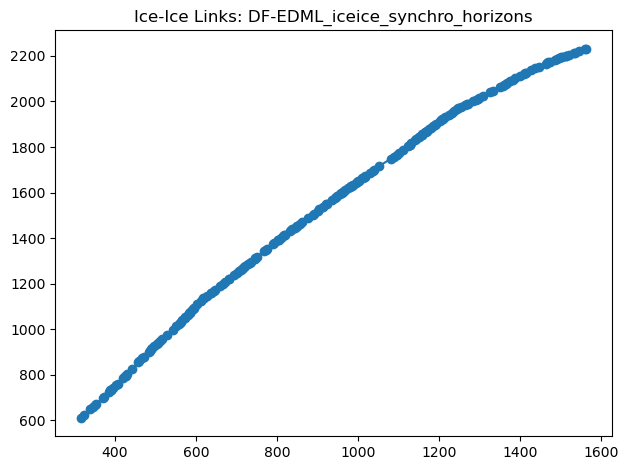

✅ EDC-NGRIP_iceice_synchro_horizons.txt: no NaNs found.


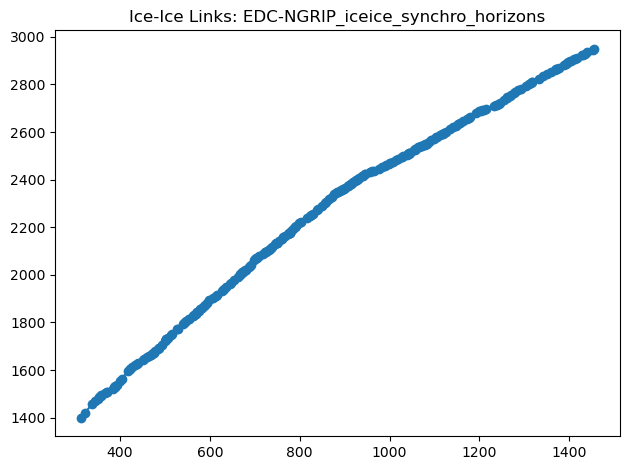

✅ NGRIP-GISP2_iceice_synchro_horizons.txt: no NaNs found.


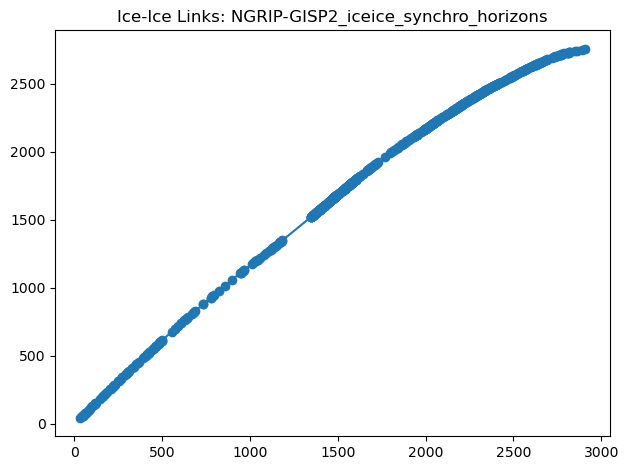

✅ DF-GISP2_iceice_synchro_horizons.txt: no NaNs found.


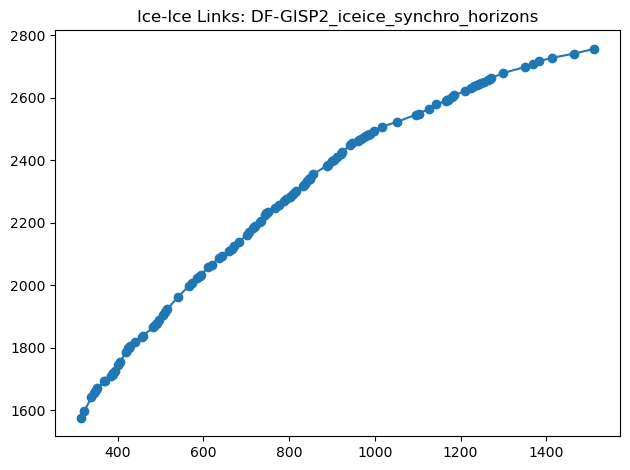

✅ EDC-GRIP_iceice_synchro_horizons.txt: no NaNs found.


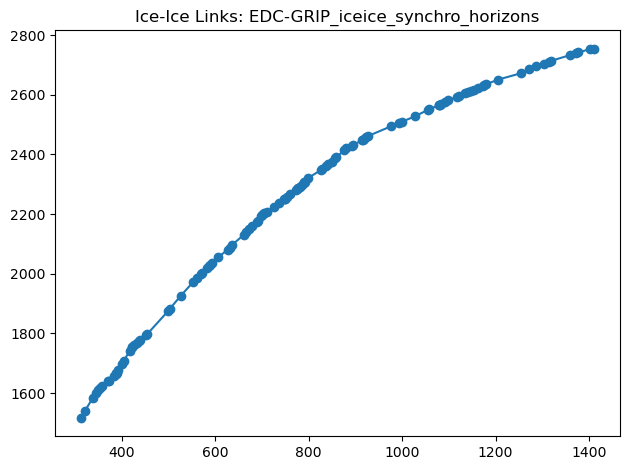

✅ NGRIP-WDC_iceice_synchro_horizons.txt: no NaNs found.


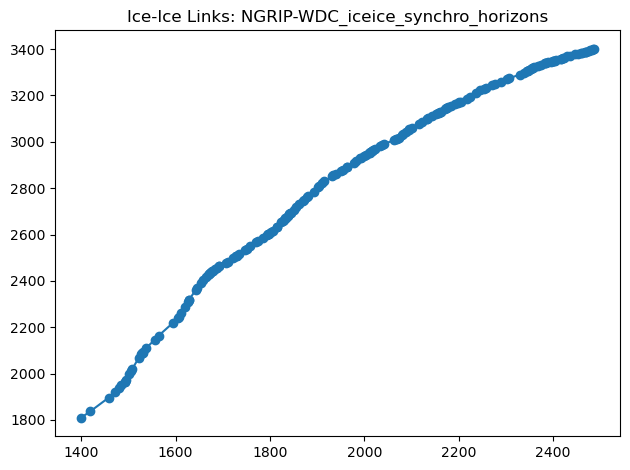

✅ EDML-WDC_iceice_synchro_horizons.txt: no NaNs found.


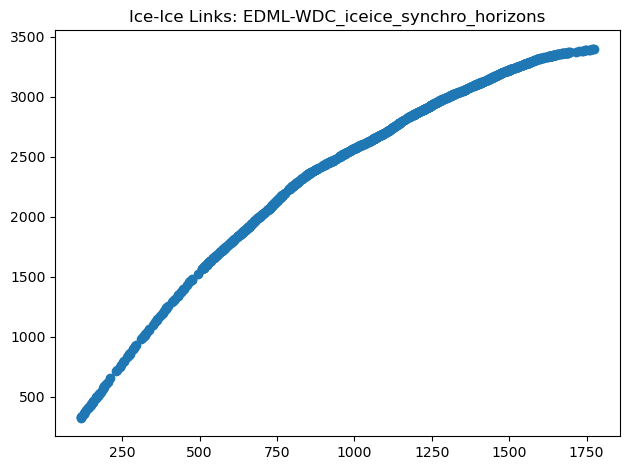

✅ EDC-WDC_iceice_synchro_horizons.txt: no NaNs found.


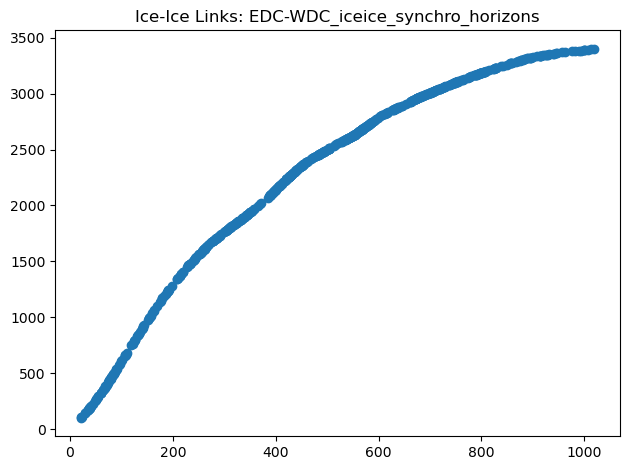

✅ EDML-GISP2_iceice_synchro_horizons.txt: no NaNs found.


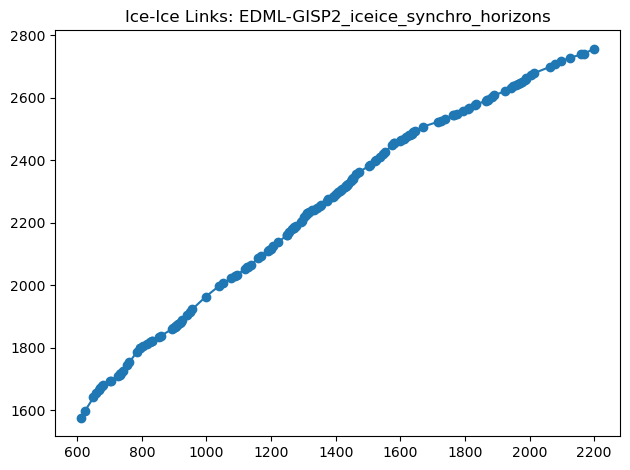

✅ NGRIP-GRIP_iceice_synchro_horizons.txt: no NaNs found.


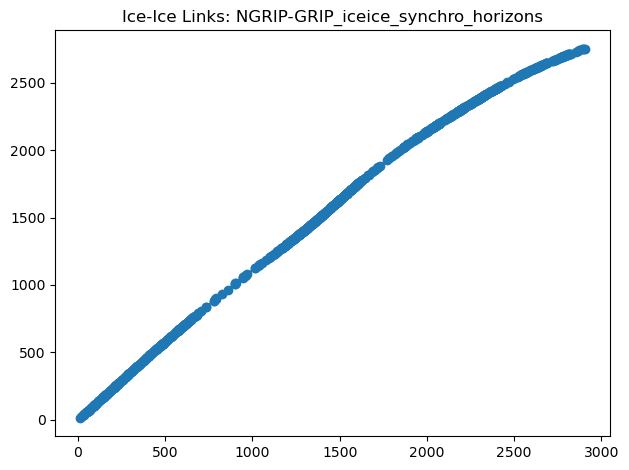

✅ EDML-GRIP_iceice_synchro_horizons.txt: no NaNs found.


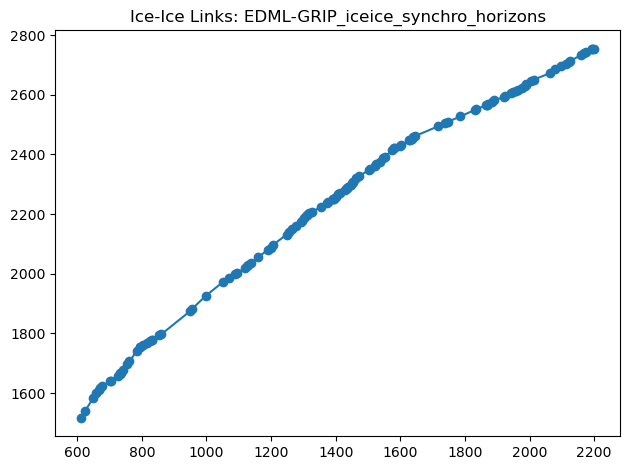

✅ DF-WDC_iceice_synchro_horizons.txt: no NaNs found.


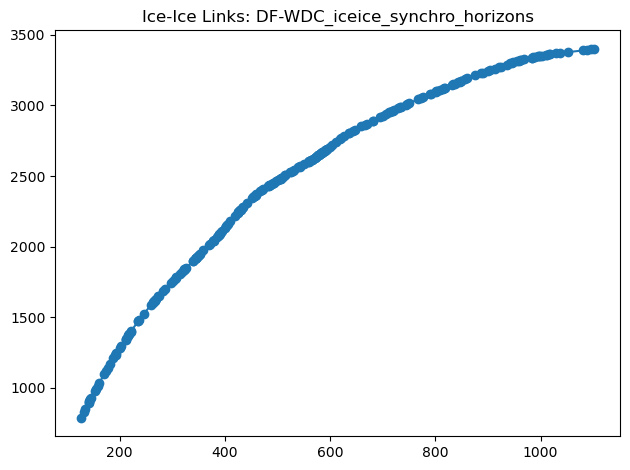

✅ EDML-NGRIP_iceice_synchro_horizons.txt: no NaNs found.


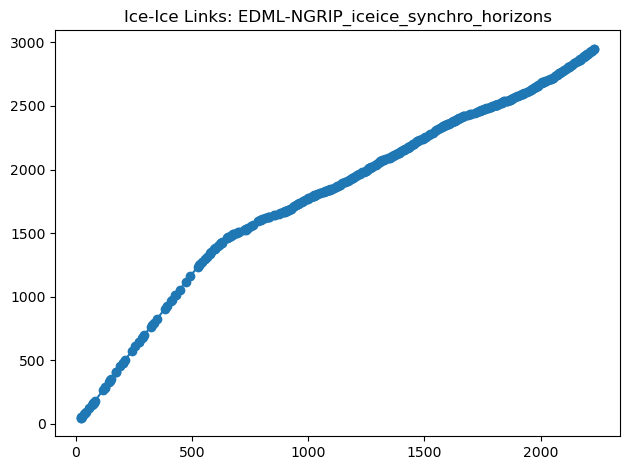

✅ GRIP-WDC_iceice_synchro_horizons.txt: no NaNs found.


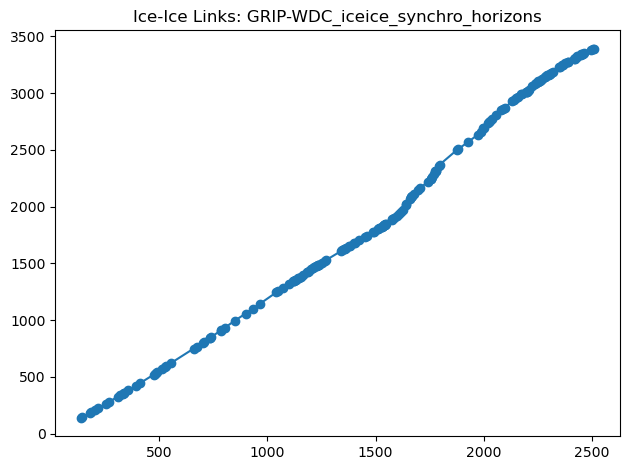

✅ GRIP-GISP2_iceice_synchro_horizons.txt: no NaNs found.


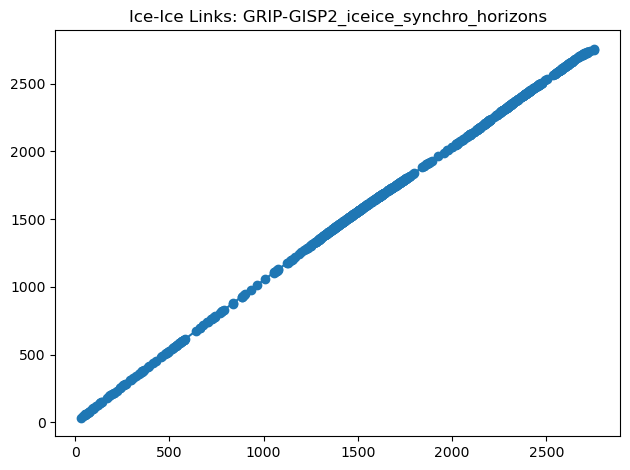

✅ EDC-GISP2_iceice_synchro_horizons.txt: no NaNs found.


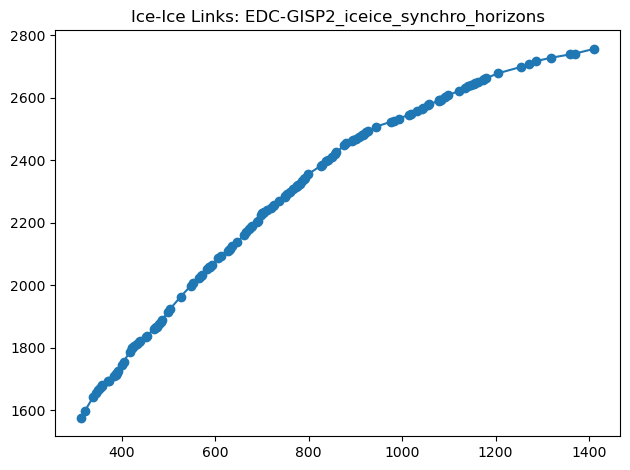

✅ WDC-GISP2_iceice_synchro_horizons.txt: no NaNs found.


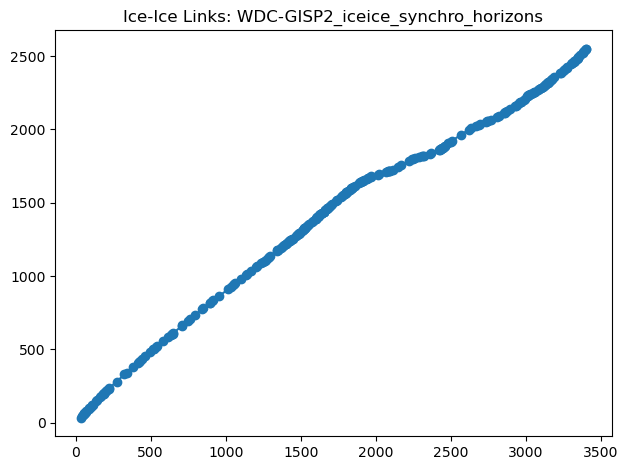

✅ EDC-EDML_iceice_synchro_horizons.txt: no NaNs found.


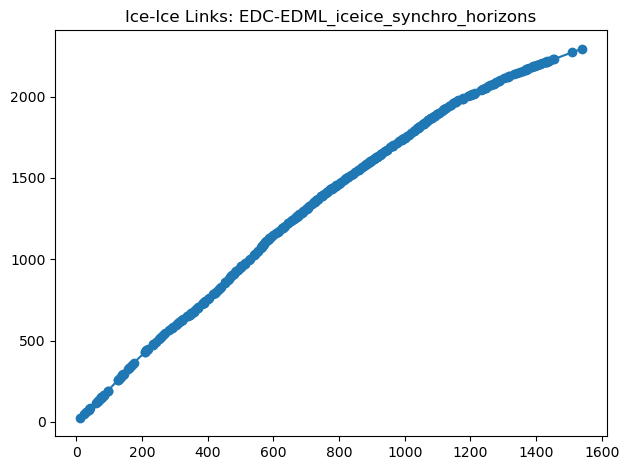

✅ DF-GRIP_iceice_synchro_horizons.txt: no NaNs found.


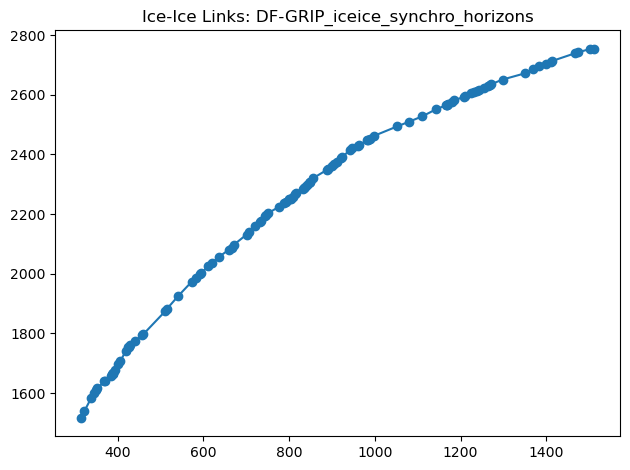

✅ DF-EDC_iceice_synchro_horizons.txt: no NaNs found.


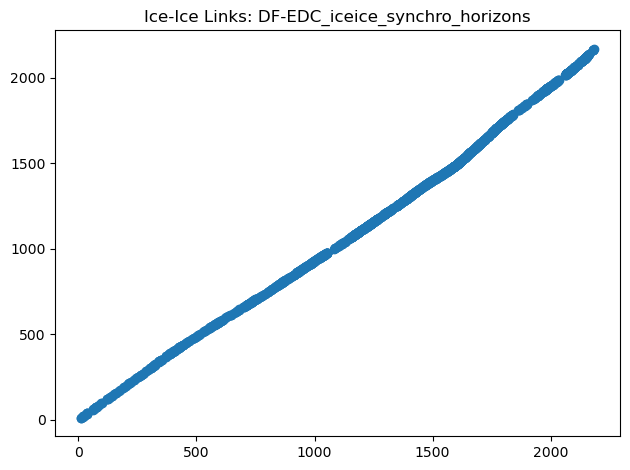

✅ DF-NGRIP_iceice_synchro_horizons.txt: no NaNs found.


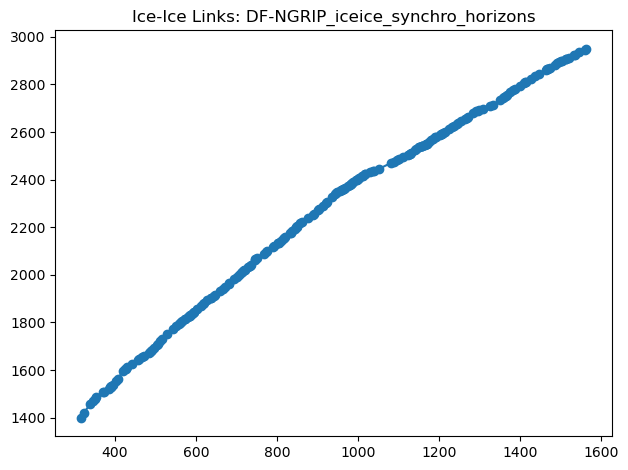

In [13]:
# --- Plotting All Exported Ice Core Links (NaN Check + Ordered Line Plot) ---
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

for file in destination_dir.glob("*_iceice_synchro_horizons.txt"):
    try:
        # Read file
        df = pd.read_csv(
            file,
            sep='\t',
            comment='#',
            usecols=[0, 1],
        )

        # Check for NaNs
        n_nans = df.isna().sum().sum()
        if n_nans > 0:
            print(f"⚠️ {file.name}: contains {n_nans} NaN values. Dropping them before plotting.")
            df = df.dropna()
        else:
            print(f"✅ {file.name}: no NaNs found.")

        # Sort by depth1
        df = df.sort_values(by='depth1')

        plt.plot(df['depth1'], df['depth2'], marker='o', linestyle='-')
        plt.title(f"Ice-Ice Links: {file.stem}")
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"❌ Error processing {file.name}: {e}")
        continue

